## LASSO RIDGE PRACTICE

1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Elastic Net
5. Polynomial Regression


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [78]:
df=pd.read_csv("Advertising.csv")

In [79]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:>

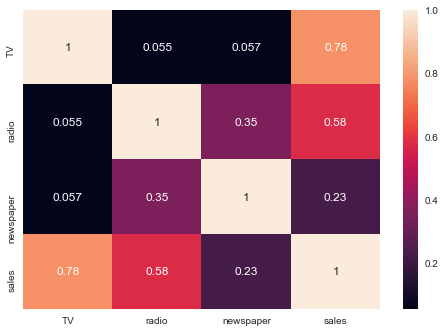

In [81]:
sns.heatmap(df.corr(), annot = True)

In [82]:
X = df.drop(["sales"], axis =1)

In [83]:
y = df["sales"]

In [84]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [85]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

**1.Linear Regression**

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lm = LinearRegression()

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2, random_state = 0)

In [89]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
dir(lm)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [91]:
lm.coef_

array([ 0.04458402,  0.19649703, -0.00278146])

In [92]:
lm.intercept_

2.9948930304953283

In [94]:
coeff_parameter = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_parameter

,Coefficient
TV,0.044584
radio,0.196497
newspaper,-0.002781


In [95]:
y_pred = lm.predict(X_test)

In [96]:
eval_metrics(y_test, y_pred)

r2_score: 0.8601145185017868 
 mae: 1.3617813502090275 
 mse: 4.402118291449686 
 rmse: 2.098122563495681


In [34]:
lm.score(X_test, y_test)

0.8601145185017868

In [35]:
r2_score(y_test, y_pred)

0.8601145185017868

In [97]:
my_dict={"Actual":y_test, "Pred":y_pred}
compare=pd.DataFrame(my_dict)

In [98]:
compare.sample(10)

,Actual,Pred
33,17.4,18.765515
12,9.2,10.769740
74,17.0,17.306513
170,8.4,7.452281
130,1.6,10.783186
179,12.6,12.294023
122,11.6,13.409916
45,14.9,15.135122
150,16.1,18.138022
183,26.2,24.066921


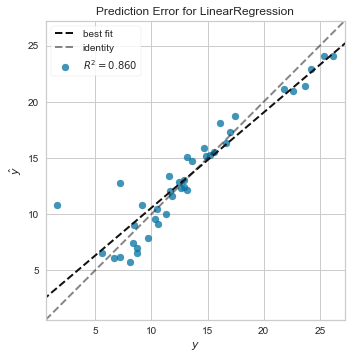

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [99]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer                 

visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and render the figure

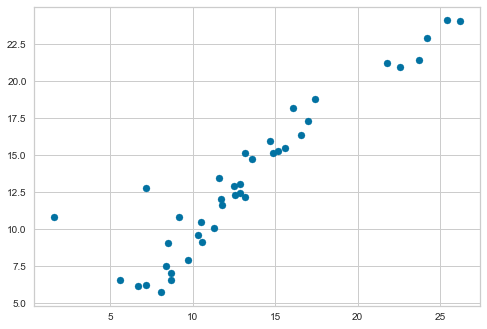

In [100]:
plt.scatter(y_test, y_pred)

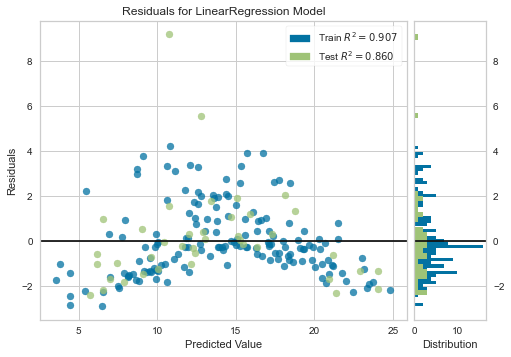

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [101]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

**Model Score with cv**

In [102]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8832984266379699

In [103]:
accuraries

array([0.88570699, 0.91205792, 0.93210001, 0.8618314 , 0.89579363,
       0.93868657, 0.79885218, 0.92502874, 0.75344298, 0.92948385])

In [104]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, scoring = "neg_mean_squared_error", cv=10)
accuraries.mean()

-2.6112323155583232

In [105]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, scoring = "neg_mean_squared_error", cv=10)
-accuraries.mean()

2.6112323155583232

In [106]:
accuraries

array([-1.71524789, -1.67158319, -1.83164463, -4.44175358, -1.22520234,
       -2.78857297, -3.57788547, -2.46388059, -4.00592555, -2.39062693])

**2.Ridge Regression**

In [107]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
scaler = StandardScaler()

In [110]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [111]:
X_train.head()

,TV,radio,newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6


In [112]:
X_train = scaler.transform(X_train)

In [113]:
X_test = scaler.transform(X_test)

In [114]:
a = pd.DataFrame(X_train, columns = X.columns)

In [115]:
a.head()

,TV,radio,newspaper
0,-1.341553,1.035518,1.659411
1,-1.405314,0.082496,-1.306297
2,-0.089952,0.402439,-0.819809
3,0.697613,-0.189796,-0.908687
4,0.766097,0.014423,1.285189


In [67]:
# scaled_X_train = scaler.fit_transform(X_train)  you can do fit_transform together
# not fit for X_test, but only transform.

In [119]:
ridge_model = Ridge()

In [120]:
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [121]:
eval_metrics(y_test, y_pred)

r2_score: 0.8599750723184534 
 mae: 1.3609514322231928 
 mse: 4.406506585272247 
 rmse: 2.0991680698010455


In [122]:
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.883606729382136

In [123]:
dir(ridge_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_set_intercept',
 'alpha',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'max_iter',
 'n_iter_',
 'normalize',
 'predict',
 'random_state',
 'score',
 'set_params',
 'solver',
 'tol']

In [124]:
ridge_model.alpha

1.0

In [125]:
ridge_model = Ridge(3).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8594890418838019 
 mae: 1.36001054722465 
 mse: 4.421801692696299 
 rmse: 2.1028080494178014


In [126]:
alpha_space = np.linspace(0.1, 20, 100)
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [127]:
help(RidgeCV)

Help on class RidgeCV in module sklearn.linear_model._ridge:

class RidgeCV(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, _BaseRidgeCV)
 |  RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False)
 |  
 |  Ridge regression with built-in cross-validation.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  By default, it performs Generalized Cross-Validation, which is a form of
 |  efficient Leave-One-Out cross-validation.
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alphas : ndarray of shape (n_alphas,), default=(0.1, 1.0, 10.0)
 |      Array of alpha values to try.
 |      Regularization strength; must be a positive float. Regularization
 |      improves the conditioning of the problem and reduces the variance of
 |      the estimates. Larger values specify stronger regularization.
 |      Alpha corresponds to ``C^-1

In [128]:
#searching for best alpha

ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [129]:
# best alpha
ridgecv.alpha_

3.7181818181818183

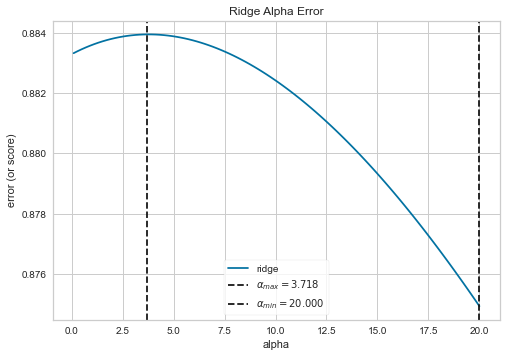

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [130]:
#let's find the same alpha with yellowbrick

from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)

visualizer.fit(X_train, y_train)
visualizer.show()

In [131]:
# train the ridge model again with best alpha
ridge_model = Ridge(3.7).fit(X_train, y_train)

In [132]:
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8839572574970613

In [133]:
accuraries

array([0.8880503 , 0.90740564, 0.93623229, 0.85756682, 0.8992068 ,
       0.93309777, 0.80879463, 0.92541755, 0.75638439, 0.92741638])

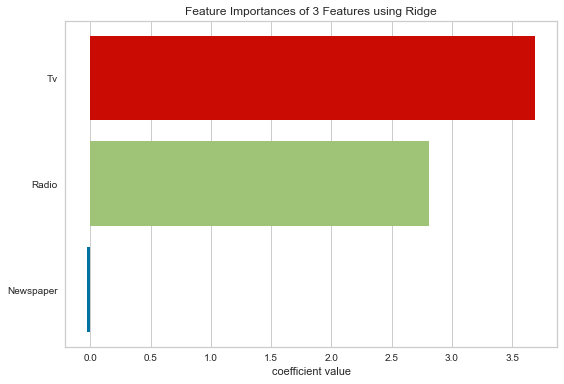

<AxesSubplot:title={'center':'Feature Importances of 3 Features using Ridge'}, xlabel='coefficient value'>

In [134]:
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [135]:
ridge_model.coef_

array([ 3.6900482 ,  2.814495  , -0.02611704])

In [136]:
lm.coef_

array([ 0.04458402,  0.19649703, -0.00278146])

**3.Lasso Regression**

In [138]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [139]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.7900277437769083 
 mae: 1.6452603285991416 
 mse: 6.607710106273169 
 rmse: 2.570546655144226


In [140]:
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8155099608241121

In [141]:
lasso_model.alpha

1.0

In [142]:
alpha_space = np.linspace(0.1, 20, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10).fit(X_train, y_train)

In [143]:
lasso_cv_model.alpha_

0.1

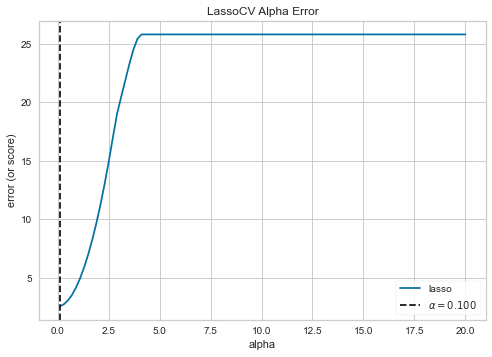

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [144]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [145]:
lasso_model = Lasso(0.1).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8597421221120997 
 mae: 1.362866639662895 
 mse: 4.413837398687648 
 rmse: 2.1009134676820103


In [146]:
lasso_model = Lasso(0.01).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.860222006957978 
 mae: 1.362983067707408 
 mse: 4.398735689523802 
 rmse: 2.097316306503099


In [147]:
# cv score when alpha is 0.1
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8836707083877627

In [148]:
lasso_model = Lasso(3).fit(X_train, y_train)

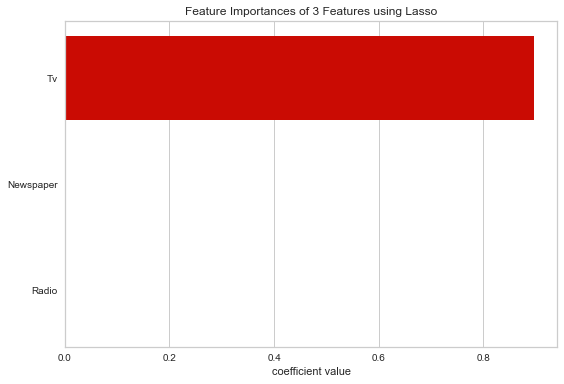

<AxesSubplot:title={'center':'Feature Importances of 3 Features using Lasso'}, xlabel='coefficient value'>

In [149]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

**4.Elastic Net**

In [150]:
from sklearn.linear_model import ElasticNetCV
elastic_model = ElasticNetCV(alphas=alpha_space, l1_ratio=[.1, .5, .7,.9, .95, .99, 1])

In [152]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13...
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
             copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbo

In [153]:
elastic_model.l1_ratio_

1.0

In [154]:
elastic_model.alpha_

0.1

In [155]:
y_pred = elastic_model.predict(X_test)

In [156]:
eval_metrics(y_test,y_pred)

r2_score: 0.8597421221120997 
 mae: 1.362866639662895 
 mse: 4.413837398687648 
 rmse: 2.1009134676820103


In [157]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=elastic_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8852431100584155

**5.Polynomial Regression**

In [159]:
# we will use not scaled X (original X)
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2)
poly_features = polynomial_converter.fit_transform(X)
poly_features.shape

(200, 10)

In [160]:
X.shape

(200, 3)

In [161]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [162]:
poly_features[0]

array([1.000000e+00, 2.301000e+02, 3.780000e+01, 6.920000e+01,
       5.294601e+04, 8.697780e+03, 1.592292e+04, 1.428840e+03,
       2.615760e+03, 4.788640e+03])

In [163]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [164]:
model = LinearRegression()

In [165]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
y_pred=model.predict(X_test)

In [167]:
eval_metrics(y_test, y_pred)

r2_score: 0.9843529333146787 
 mae: 0.48967980448037013 
 mse: 0.44175055104036515 
 rmse: 0.6646431757269198


In [168]:
accuraries = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.9814092804779205

In [169]:
accuraries

array([0.98721689, 0.99303246, 0.9905022 , 0.98369201, 0.98423858,
       0.93187129, 0.9907614 , 0.99330359, 0.96496016, 0.99451422])

In [170]:
#y_pred_train=model.predict(X_train)
#eval_metrics(y_train, y_pred_train)

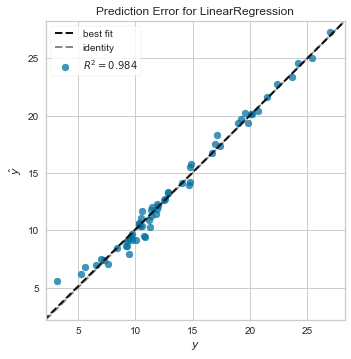

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [171]:
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

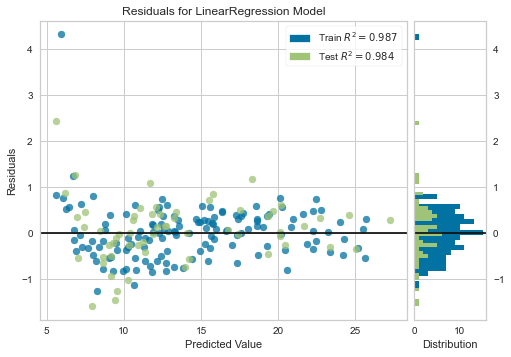

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [175]:
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [176]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=5)
poly_features = polynomial_converter.fit_transform(X)
poly_features.shape

(200, 56)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [178]:
model = LinearRegression()

In [179]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [180]:
y_pred=model.predict(X_test)

In [181]:
eval_metrics(y_test, y_pred)

r2_score: 0.5764335551427187 
 mae: 0.78011213915598 
 mse: 11.958197289044781 
 rmse: 3.4580626496703006


In [182]:
y_pred=model.predict(X_train)
eval_metrics(y_train, y_pred)

r2_score: 0.9969949615680962 
 mae: 0.2200173226981971 
 mse: 0.07908105746157418 
 rmse: 0.281213544235647


In [183]:
accuraries = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8854001190273143